<a href="https://colab.research.google.com/github/AleksandrRevuka/HW_Data_Science/blob/main/Hw3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

напишіть функцію гіпотези лінійної регресії у векторному вигляді;

In [ ]:
import numpy as np

def hypothesis(theta, X):
    return np.dot(X, theta)

створіть функцію для обчислення функції втрат у векторному вигляді;

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    J = (1 / (2 * m)) * np.sum(np.square(X.dot(theta) - y))
    return J

реалізуйте один крок градієнтного спуску;

In [ ]:
def gradient_descent_step(X, y, theta, learning_rate):

    m = len(y)
    predictions = np.dot(X, theta)
    errors = predictions - y
    gradient = (1 / m) * np.dot(X.T, errors)
    theta = theta - learning_rate * gradient
    return theta

знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [65]:

import pandas as pd

data = pd.read_csv("Housing.csv")

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [66]:
import numpy as np
import pandas as pd

def normalize_feature(feature):
    mu = np.mean(feature)
    sigma = np.std(feature)
    normalized_feature = (feature - mu) / sigma
    return normalized_feature, mu, sigma

def add_intercept(X):
    return np.c_[np.ones(X.shape[0]), X]

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors**2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

data = pd.read_csv("Housing.csv")

selected_features = ['area', 'bathrooms', 'bedrooms']
target = 'price'

X = data[selected_features].values
y = data[target].values

# Нормалізація ознак
for i in range(X.shape[1]):
    X[:, i], mu, sigma = normalize_feature(X[:, i])

# Додавання константного стовпчика
X = add_intercept(X)

# Ініціалізація параметрів
theta_initial = np.zeros(X.shape[1])

# Налаштування гіперпараметрів градієнтного спуску
learning_rate = 0.001
iterations = 10000

# Запуск градієнтного спуску
theta_optimal, cost_history = gradient_descent(X, y, theta_initial, learning_rate, iterations)

print("Оптимальні параметри (w):", theta_optimal)


Оптимальні параметри (w): [4293670.3799834   834270.22749395 1265272.74885706  464833.11507277]


знайдіть ці ж параметри за допомогою аналітичного рішення;

In [67]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

theta_optimal_analytical = normal_equation(X, y)

print("Оптимальні параметри за допомогою аналітичного рішення:", theta_optimal_analytical)


Оптимальні параметри за допомогою аналітичного рішення: [4316380.34126579  839082.7656552  1210983.66933953  491180.49283573]


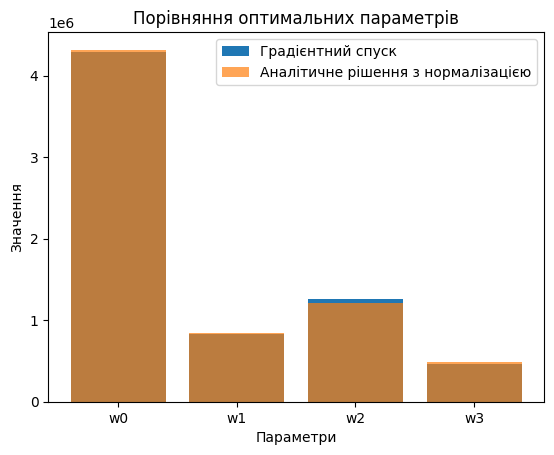

In [68]:
import matplotlib.pyplot as plt

plt.bar(['w0', 'w1', 'w2', 'w3'], theta_optimal, label='Градієнтний спуск')
plt.bar(['w0', 'w1', 'w2', 'w3'], theta_optimal_analytical, alpha=0.7, label='Аналітичне рішення з нормалізацією')

plt.xlabel('Параметри')
plt.ylabel('Значення')
plt.title('Порівняння оптимальних параметрів')
plt.legend()
plt.show()